#Introduction 




This jupyter notebook represents a *executable report* on a recent paper titled "**A Kerr Polarization Controller**" by Niall Moroney (lead author). Also, this report includes the required background concepts and theoretical analysis on the main subject of **Kerr nonlinearity induced symmetry breaking**, which is given in **ref. 14** of the main paper.  



This executable report has relevant calculations/derivations, plots obtained from raw data (data provided by the lead author himself), and the code used for the analysis. We have included desmos graphs at various places allowing the reader to vary the parameters and providing the required interactive experience. 

# Abstract

In the paper, it is demonstrated how Kerr effect in a *high finesse*
**Fabry-Pérot resonator** can be utilized to control the polarization of a continuous wave
laser. It is shown that a linearly-polarized input field is converted into a left or right circularly
polarized field, controlled via the optical power. The observations are explained by
Kerr-nonlinearity induced symmetry breaking, which splits the resonance frequencies of
degenerate modes with opposite polarization handedness in an otherwise symmetric resonator.

The Lugiato-Lefever equation:

The evolution of
the electric field (**E**) in a nonlinear resonator is given by the **Lugiato–Lefever
equation**.

From a mathematical viewpoint, the LLE amounts to a driven, damped, detuned **nonlinear Schrodinger equation**

$$\frac{\partial \vec{E}}{\partial t} = -\vec{E} - i\theta \vec{E} + \vec{E'}+ i(A(\vec{E} \cdot \vec{E^*})\vec{E}) + \frac{B}{2}(\vec{E} \cdot \vec{E})\vec{E^*})-\nabla^2\vec{E}$$

The LLE is generalized to take into account polarization (according to Kerr effect).

Neglecting dispersive effects and assuming a uniform, slowly evolving cavity field,
$$\frac{\partial \vec{E}}{\partial t} = -\vec{E} - i\theta \vec{E} + \vec{E'}+ i(A(\vec{E} \cdot \vec{E^*})\vec{E}) + \frac{B}{2}(\vec{E} \cdot \vec{E})\vec{E^*})$$

where,
$\vec{E'}$ represents the driving term, $- \vec{E}$  the damping term,  $i\delta\vec{E}$ the detuning term, and the rest is the polarization term.

The last term can be simplified by assuming $A = B$ which is the case for nonresonant electronic responses. 

The electric field can be split into two linear components $\vec{x}, \vec{y}$ using 

$$\vec{E} = E_x\vec{x} + E_y \vec{y} $$


which transforms the equation to-

$$\frac{\partial E_{x,y}}{\partial t} 
= -(1 + i\theta)E_{x,y} + E'_{x,y}+ iA([|E_x|^2  + |E_y|^2]E_{x,y} + \frac{1}{2}[E_x^2  + E_y^2]E^*_{x,y})$$

The nonlinear term shows equal amounts of self- and cross-phase
modulation. The balanced effects of self- and
cross-phase modulation ensure that it is not possible to break symmetry in this basis.
The circular basis is defined as

$$ E_\pm = \frac{ E_x \pm\iota E_y}{ \sqrt{2}}$$

which gives, 

$$ \frac{\partial E_\pm }{\partial t} = \frac{1}{2}\left(\frac{\partial E_x }{\partial t} \pm \iota\frac{\partial E_y }{\partial t}\right)$$

Using this we can get the following equation:
$$\frac{dE_{\pm}}{dt}  = \tilde{E}_{\pm} - E_{\pm} - i\theta E_{\pm} + i( |E_{\pm}|^2 + 2 |E_{\mp}|^2) E_{\pm} $$
where, $E_{+}$ and $E_{-}$ correspond to right handed and left handed circular polarizations, respectively. $\tilde{E}_{\pm}$ are the input electric fields for the right and left circular polarizations sent to the  cavity. $\delta$ is the cavity detuning factor.

The Intracavity field $E_{\pm}$ is driven, damped and detuned.

Input field $\tilde{E}_{\pm}$ is the driving term, $-E_{\pm}$ is the damping term and the term $-i(\theta-|E_{\pm}|^2+2|E_{\mp}|^2)$ collectively responsible for detuning.

Now, in the steady state,
$$\frac{dE_{\pm}}{dt} = 0$$ 

$\implies \tilde{E}_{\pm} - E_{\pm} - i\theta E_{\pm} + i( |E_{\pm}|^2 + 2 |E_{\mp}|^2) E_{\pm} = 0 $

$\implies \tilde{E}_{\pm} = E_{\pm}(1 - i(|E_{\pm}|^2 + 2 |E_{\mp}|^2 -\theta))$

$\implies E_{\pm} = \frac{\tilde{E}_{\pm}}{1 - i(|E_{\pm}|^2 + 2 |E_{\mp}|^2 -\theta)}$

Multiplying this equation with it's complex conjugate one would obtain,

$$\boxed{|E_{\pm}|^2 = \frac{|\tilde{E}_{\pm}|^2}{1 + (|E_{\pm}|^2 + 2 |E_{\mp}|^2 -\theta)^2}}$$

Since square of electric field is proportional to intensity, therefore we can re-write the above equation in terms of the intensity of the right and left handed circular polarizations, $P_1$ and $P_2$ as,

$$\boxed{P_{1,2} = \frac{I}{1 + (P_{1,2} + 2 P_{2,1} -\theta)^2}}$$

where $I$ are the input intensities corresponding to the right and left handed circular polarizations.



##Visualizing elliptic polarization


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wg
from math import pi
from IPython.display import Image
from IPython.display import IFrame

def visualize(left_amp,right_amp):
  '''
  Function to visualize the resultant polarization of the output light
  The equation for left polarization will be of the form: (x-polarization,y-polarization) = (A cos wt, A sin wt)
  The equation for right polarization will be of the form: (x-polarization,y-polarization) = (B cos wt, -B sin wt)
  Hence the equation of the resulting polarization envelope will be given by (x-polarization, y-polarization) = ((A+B) cos wt , (A-B) sin wt)
  Here, A = left_amp, i.e. amplitude of the left handed polarization
  and B = right_amp, i.e. amplitude of the right handed polarization
  '''
  plt.xlim(-15, 15)
  plt.ylim(-15, 15)
  t = np.linspace(0, 2*pi, 100)
  plt.plot( (left_amp+right_amp)*np.cos(t) , (left_amp-right_amp)*np.sin(t) )
  plt.grid(color='lightgray',linestyle='--')
  plt.gca().set_aspect('equal', adjustable='box')
  plt.show()

print("Use the sliders to adjust the values for the amplitude of the left circular polarization (left_amp) and right circular polarization (right_amp)")
left_amp_slider = wg.FloatSlider(value=5,min=-10,max=10,step=0.5)    # Slider to get amplitude of left circular polarization
right_amp_slider = wg.FloatSlider(value=5,min=-10,max=10,step=0.5)   # Slider to get amplitude of left circular polarization
wg.interact(visualize, left_amp=left_amp_slider, right_amp=right_amp_slider)

Use the sliders to adjust the values for the amplitude of the left circular polarization (left_amp) and right circular polarization (right_amp)


interactive(children=(FloatSlider(value=5.0, description='left_amp', max=10.0, min=-10.0, step=0.5), FloatSlid…

<function __main__.visualize(left_amp, right_amp)>

The blue line represents the envelope of the combined, final polarization.This graph helps us visualize that how for different amplitudes (and hence different intensities) of the circular polarizations, we can get different output polarizations ranging from circular to elliptical or horizontally or vertically polarized. 

We can clearly observe that for equal left handed and right handed polarization intensities we get a straight line, i.e. linear polarization. When the left and right handed polarizations are unequal we get an elliptical polarization, and when one polarization becomes negligible compared to the other, we get a circular polarization as expected. 

This shows us how by controlling the transmission of the 2 polarizations we can effectively control the polarization of the light coming out of the cavity.

Link to interactive desmos plot below visualizing the steady state intensity solutions of the Luigato Lefever equation:

https://www.desmos.com/calculator/hmxuhtr6xz

As we can clearly see, that above a threshold intensity, for a detuning greater than a certain threshold, we obtain solutions for intensity values away from the solution where $I_+ = I_-$



# Relevant plots and analysis of the steady state solution equations.

## Coupled Lorentz Equations

In the below plots and analysis we consider the following variables :

$P_1, P_2  = $  $ |E_{+}|^2$ and $|E_{-}|^2$ (Polarization Mode Powers)

$I = $ Intensity of the input light

$\theta = $ Detuning parameter

$$P_{1,2} = \frac{I}{1 + (P_{1,2} + 2 P_{2,1} -\theta)^2}$$

The plot below represents the two original equations we get from considering steady state.
 
These plots are made by considering fixed values of $I$ and $\theta$ and their intersection gives us the possible solutions in steady state. 

In [ ]:
#Coupled_Lorentz_Equations
from IPython.display import IFrame
IFrame(src="https://www.desmos.com/calculator/85ftakdozf", width=1150, height=500)

## Eliminating Intensity



The Ellipse below represents the plot of polarization powers when $\theta$ is kept at a fixed value and $I$ is left to vary. 
 
To obtain this ellipse we first need to eliminate $I$ from the coupled equations.
 
The following equation is then obtained - 
 
$$ P_1 [ 1 + (\theta - AP_1 - BP_2)^2] = P_2[ 1 + (\theta - AP_2 - BP_1)^2]$$
 
We can factor out the $ P_1 = P_2$ term from this equation and obtain the equation of a conic section :
 
$$[ \theta - A(P_1 + P_2)]^2 - P_1P_2(B - A)^2 + 1 = 0 $$
 
The type of conic section that can will be obtained depends on how $\theta$ relates with $A$ and $B$. 

 
To find out the conditions we rearrange the equation as follows :
 
$$ A^2P_1^2 + A^2P_2^2 + (2A^2 - (B -A)^2)P_1P_2 - 2A\theta P_1 - 2A\theta P_2 + \theta^{2} + 1 = 0$$

This equation can be compared with the general quadric equation :

$$Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0$$

to get the corresponding values as :

$  A =  A ^2$

$B = 2A ^2 - (B-A)^2$

$C = A^2$

$D = -2A\theta$

$E = -2A\theta$

$F = \theta^2 + 1$

The type of conic section will depend on the value of $ B^2 - 4AC $

if it is positive $\implies$ hyperbola

if it is zero $\implies$ parabola

if it is negative $\implies$ ellipse

Calculating the same for the obtained A, B and C values :

$B^2 - 4AC = (A - B)^2 (3 A -B)(A + B)$

One can note that for $\frac{B}{A} > 3$ or $\frac{B}{A} <-1 $, We are getting a hyperbola that means a solution can be found for any value of detuning.

 
In our case we have $ A = 1$ and $ B = 2$, which means there should be an ellipse, but to determine if the ellipse exists in th real plane or is imaginary we need the following determinant to be less than zero :

\begin{vmatrix}
A & \frac{1}{2} B & \frac{1}{2} D\\
\frac{1}{2}B & C & \frac{1}{2} E \\
\frac{1}{2}D & \frac{1}{2} E & F
\end{vmatrix}

$$ =\left( AC - \frac{B^2}{4} \right)F + \frac{BED}{4} - \frac{CD^2}{4} -\frac{AE^2}{4}$$

$$ = -\frac{(B-A)^2(3A -B)(A+B)}{4}(\theta^2 + 1) + A^2\theta^2(2A ^2 - (B-A)^2) - 2A^4\theta^2$$

$$ =(B - A)^2\frac{ ((4A^2 - (B -A)^2)(\theta^2 + 1) - 4A^2\theta^2)}{4} $$

We obtain the condition on $\theta$ : 
 
$$ 4A^2\theta^2  - (4A^2 - (B -A)^2)(\theta^2 +1) > 0$$
 
$$ \theta^2 > \frac{(3A - B)(A+B)}{(A - B)^2} $$
 
$$ |\theta| >\frac{\sqrt{( 3 - \frac{B}{A})(1 + \frac{B}{A})}}{|(1 - \frac{B}{A})|}$$ 
 
In our case we have $ A = 1$ and $ B = 2$, whichmeans that symmetry breaking can only occur for $\theta$ greater than $\sqrt{3}$ 

PS : The actual range of detuning for which symmetry breaking depends on $I$,
The above condition just says that the $ |\theta| $ values in that range should be greater than $\sqrt{3}$, irresptive of $I$.


In [ ]:
#Ellipse(P1_v/s_P2@fixed_d)
from IPython.display import IFrame
IFrame(src="https://www.desmos.com/calculator/ie8y7zhhhx", width=1150, height=500)

We can clearly see that below the threshold power, the equation is symmetric w.r.t both  E+  and  E− . Hence, if the input wave was a linearly polarized wave, it would have equal values for the components  E~± . Hence, we can say that the outputs  E+=E−  in this case.

But above some threshold power this symmetry breaks down and we get different amplitudes for the left and right handed circular polarizations.

## Eliminating Detuning

$$P_{1,2}=\frac{I}{1+(\theta-AP_{1,2}-BP_{2,1})^2}$$

One can also try to eliminate the detuning from the equations,

$$\theta=AP_{1,2}+BP_{2,1}\pm\sqrt{\frac{I}{P_{1,2}}-1}$$
$$AP_{1}+BP_{2}\pm\sqrt{\frac{I}{P_{1}}-1}=AP_{2}+BP_{1}\pm\sqrt{\frac{I}{P_{2}}-1}$$


In [ ]:
#Leaf(P1_v/s_P2@fixed_I)
from IPython.display import IFrame
IFrame(src="https://www.desmos.com/calculator/hisndm7dlg", width=1150, height=500)

##All plots on a pane

In [ ]:
#Insightful_Mess
from IPython.display import IFrame
IFrame(src="https://www.desmos.com/calculator/5r9uf4lqly", width=1150, height=500)

## Eliminating one of the intracavity powers



The equation for symmetric solution is trivial to obtain, one just needs to substitute $P_1=P_2=P$ in the coupled lorentz equation which leads to,
$$P=\frac{I}{1+(\theta-(A+B)P)^2}$$

The equation for assymetric solution neads a bit of solving. One of the coupled Lorentz equation,

$$P_1=\frac{I}{1+(\theta-AP_1-BP_2)^2}$$

can be used to express $P_2$ in terms of $P_1,\theta,I$,

$$P_2=\frac{1}{B}\left(\theta-AP_1\pm\sqrt{\frac{I}{P_1}-1}\right)$$

One can substitute this in the other coupled Lorentz equation,

$$P_2=\frac{I}{1+(\theta-AP_2-BP_1)^2}$$

which leads to,

$$\left(\theta-AP\pm\sqrt{\frac{I}{P}-1}\right)\left[1+\left(\theta\left(1-\frac{A}{B}\right)-\frac{A^2}{B}P\mp\frac{A}{B}\sqrt{\frac{I}{P}-1}-BP\right)^2\right]=I$$

where $P_1$ has been replaced by $P$.

In the above derived equation one can keep detuning($\delta$) a constant and plot the graph between $P$ and $I$.

In [ ]:
#P_v/s_I@fixed_d
from IPython.display import IFrame
IFrame(src="https://www.desmos.com/calculator/kwh3mbzzg9", width=1150, height=500)

In the same equation, one can fix $I$ and can plot the graph between $P$ and $\theta$.

In [ ]:
#P_v/s_d
from IPython.display import IFrame
IFrame(src="https://www.desmos.com/calculator/tuqal3exkz", width=1150, height=500)

If one eliminates the unstable parts of the graph and plot only the stable one's, it'll look as following,

## Simulated Resonance

In [ ]:
!wget 'https://raw.githubusercontent.com/abeerm24/ph421-grp-project/main/desmos-graph.png'
!wget 'https://raw.githubusercontent.com/abeerm24/ph421-grp-project/main/ellipticity.png'
!wget 'https://raw.githubusercontent.com/abeerm24/ph421-grp-project/main/width.png'

--2022-10-29 14:39:54--  https://raw.githubusercontent.com/abeerm24/ph421-grp-project/main/desmos-graph.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63282 (62K) [image/png]
Saving to: ‘desmos-graph.png.2’

desmos-graph.png.2  100%[===================>]  61.80K  --.-KB/s    in 0.01s   

2022-10-29 14:39:54 (5.03 MB/s) - ‘desmos-graph.png.2’ saved [63282/63282]

--2022-10-29 14:39:54--  https://raw.githubusercontent.com/abeerm24/ph421-grp-project/main/ellipticity.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93750 (92K)

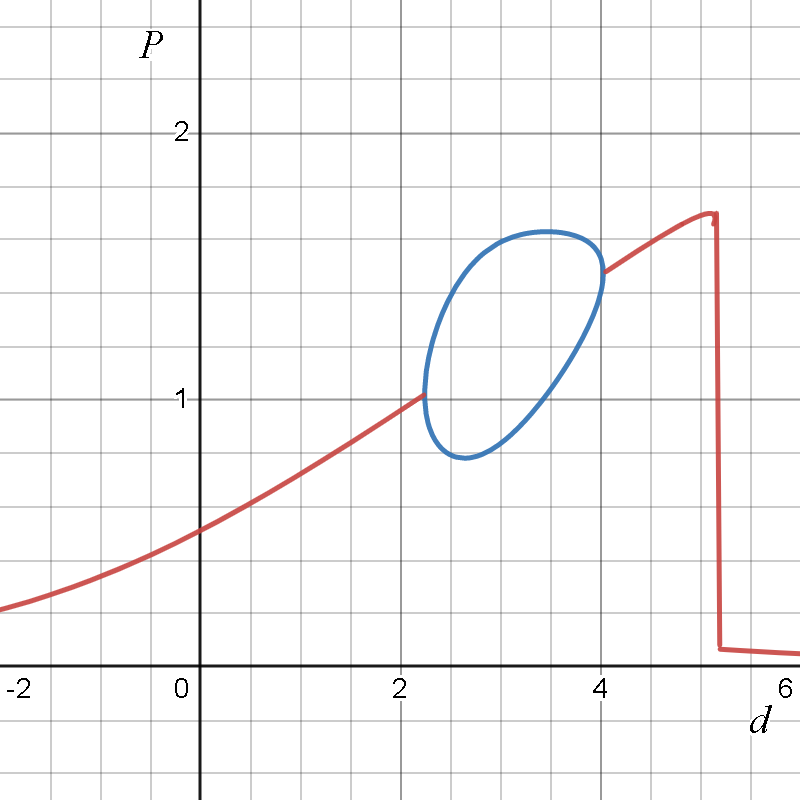

In [ ]:
from IPython.display import Image
Image('desmos-graph.png', height=400, width=600)

Where the red curve represents the symmetric solution, where the intensity of left and right handed waves are same(i.e; $P_1=P_2$). The blue curve represents symmetry breaking for certain values of detuning.

Why does this plot looks different from the experimental one obtained from raw-data. And are the experimental plots simulatable? The answer is no and the authors themselves said so in the peer review file. 


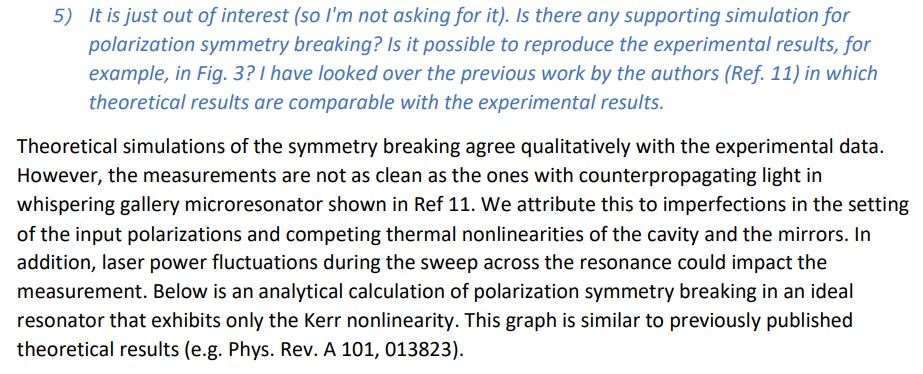

Ouptut Polarization Ellipticity $2\chi$ v/s Input Power

Stokes Parameter which defines the ellipticity of light $2\chi$ is given by,

$$2\chi=\tan^{-1}\left(\frac{1}{2}\left(\frac{|E_+|}{|E_-|}-\frac{|E_-|}{|E_+|}\right)\right)$$

The above plot is from our main reference paper and is included here to compare and comment about our simulation

## Ellipticity and Polarization Splitting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


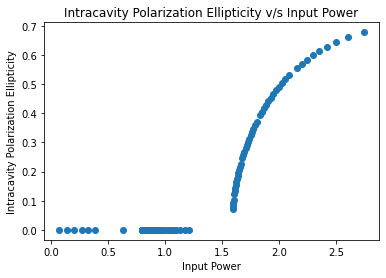

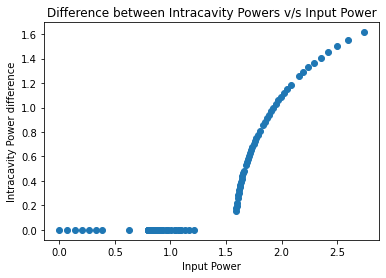

In [4]:
#Simulating Ellipticity of Intracavity 
import math 
import numpy as np
import matplotlib.pyplot as plt
  
# function for finding roots
def equationroots1( a, b, c): 
  
    # calculating discriminant using formula
    dis = b * b - 4 * a * c 
    sqrt_val = math.sqrt(abs(dis)) 
      
    # checking condition for discriminant
    if dis > 0: 
        return (-b + sqrt_val)/(2 * a)
    else:
        return 0 
def equationroots2( a, b, c): 
  
    # calculating discriminant using formula
    dis = b * b - 4 * a * c 
    sqrt_val = math.sqrt(abs(dis)) 
      
    # checking condition for discriminant
    if dis > 0: 
        return (-b - sqrt_val)/(2 * a)
    else:
        return 0 
# Driver Program 
low=0
high=1
E1 = np.arange(low,high,0.01)
p11 = np.arange(low,high,0.01)
p12 = np.arange(low,high,0.01)
p21 = np.arange(low,high,0.01)
p22 = np.arange(low,high,0.01)
I = np.arange(low,high,0.01)
ell = np.arange(low,high,0.01)
diff = np.arange(low,high,0.01)
for x in E1:
    d = 2.5
    a = 1
    b = x - 2*d
    c = x*x + d*d + 1 - 2*d*x

    # If a is 0, then incorrect equation
    y1 = equationroots1(a, b, c)
    y2 = equationroots2(a, b, c)
    if y1 != 0:
        p11[int((x-0.4)*100)]=x
        p21[int((x-0.4)*100)]=y1
    '''else:
        p11[int(x*100)]=x
        p21[int(x*100)]=x'''
    if y2 != 0:
        p12[int((x-0.4)*100)]=x
        p22[int((x-0.4)*100)]=y2
    '''else:
        p12[int(x*100)]=x
        p22[int(x*100)]=x'''

for i in range(len(p11)):
    I[i]=p12[i]*(1 + (d - p12[i] - 2*p22[i])**2)

    ell[i]=(np.arctan(-(1/2)*(math.sqrt(p12[i]/p22[i]) - math.sqrt(p22[i]/p12[i]))))
for i in range(len(p11)):
    diff[i]=(p22[i]-p12[i])


f=plt.figure()
f.set_figwidth(6)
f.set_figheight(4)

plt.scatter(I,ell)
plt.title("Intracavity Polarization Ellipticity v/s Input Power")
plt.xlabel("Input Power")
plt.ylabel("Intracavity Polarization Ellipticity") 
plt.show()
plt.scatter(I,diff)
plt.title("Difference between Intracavity Powers v/s Input Power")
plt.xlabel("Input Power")
plt.ylabel("Intracavity Power difference") 
plt.show()

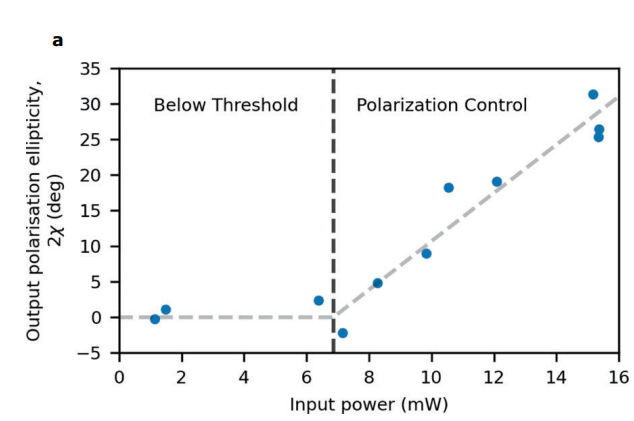

In [ ]:
from IPython.display import Image
Image("ellipticity.png")


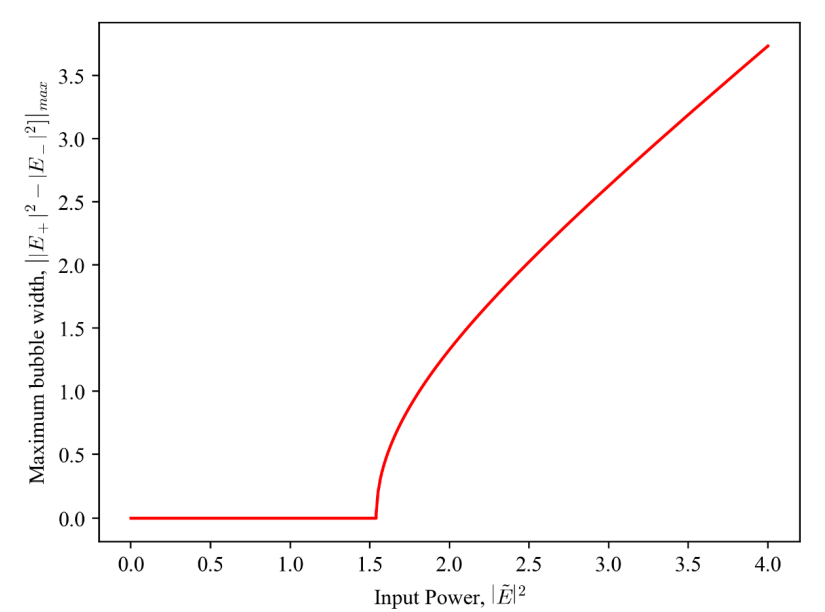

In [ ]:
from IPython.display import Image
Image("width.png")

The above graphs are extracted from the main paper and it's review doc to compare and comment on our simulations.

# Experimental setup

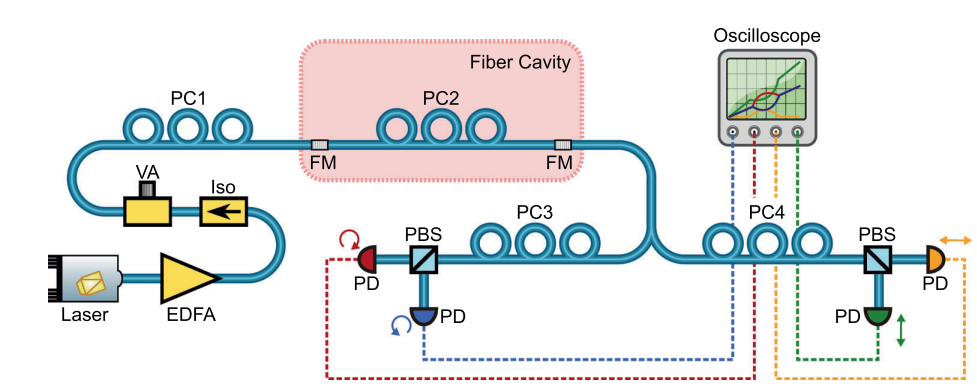

In the experiment, light from a tunable diode laser is amplified
by an erbium-doped fiber amplifier (EDFA). 

It is then sent through an isolator to minimize unwanted effects from back
reflections of the fiber cavity.

The output polarization of the EDFA changes with power, so the power input to the cavity is instead controlled using a variable attenuator which maintains
polarization across the required power range.

Finally, the input polarization is set to linear by a polarization controller (PC1) before entering the cavity. This polarization state is henceforth
defined to be the **vertical polarization direction**.

A high-finesse Fabry–Pérot fiber cavity is realized by connecting an optical fiber on both ends to fibers with dielectric Bragg mirror stacks (fiber mirror, FM). To attain degenerate polarization modes, a polarization controller (PC2) is placed within the cavity, which is used to cancel any birefringence in the fiber and mirrors.

The cavity for this work is made from a 2-m-long single-mode
silica fiber, connected at both ends to highly reflective dielectric
Bragg mirrors that are coated onto fiber ends. The mirrors have
a reflectivity > 99% at the resonant wavelength $ \lambda = $ 1550 nm.

The cavity free spectral range can be found to be $\frac{c}{2L} = \frac{3 × 10^8}{2 × 2} = 75 $ MHz. Given that the cavity has a high Finess of $F \approx 140$, we obtain cavity linewidth of $\delta \nu = \frac{\text{free specral range}}{F} = \frac{75}{140} \approx 0.5$ MHz, which is approximately the same as the cavity linewidth mentioned in the paper ($\delta \nu = 0.4$ MHz). 

We then obtain the cavity quality factor to be $Q = \frac{\omega_0}{\delta \omega}$, where $\omega_0$ is the resonant frequency and $\delta \omega$ is the cavity line width. Now $ \nu_0 = c/ \lambda = 1.93 \times 10^{14} $ Hz. Thus, quality factor $Q = \frac{1.93 \times 10^{14}}{0.4 \times 10^{6}} \approx 4.8 \times 10^8 $. 

Light then enters the cavity and builds up in intensity, with
some part exiting through the output port. The output signal is
then split and each branch is sent to a photodiode via a
polarization controller and polarization beam splitter (PBS).

The polarization controllers are set to map the cavity polarization
modes to the PBS basis, with one branch monitoring the opposite
circular polarizations and the other monitoring the vertical and
horizontal polarizations

The signals from the photodiodes can then be used for real-time monitoring of the cavity polarization state when the laser frequency is swept across a resonance.

We use an oscilloscope to measure the voltages generated across each of the photodiodes and since voltage across the photodiode must be directly proportional to the incident optical power, we just need to find and multiply a caliberation factor to find the 

**Polarization controller alignment:**

Single mode optical fibers support light of arbitrary polarization. Also stresses and bending of the fiber can change this polarization state of light during propagation. Therefore, we use polarization controllers to set the polarization state at each point in the experimental setup.

First we tune the polarization controllers PC1 and PC2. 

The controllers PC1 and PC2 are aligned such that the polarization modes are close enough to be considered degenerate (i.e. the difference in the resonance frequencies is negligible and well below 5% of their
linewidths).

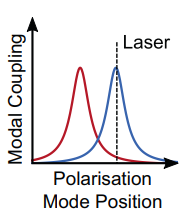

We check that the two polarization modes have the same
longitudinal mode number by confirming the mode overlap across multiple
resonance pairs by varying the input laser frequency accross its tuning range.

PC3 is adjusted until the signals from the photodiodes for left- and right-circularly polarized light are as symmetric as possible. As PC1 nears the correct state—such that its output is linearly polarized—the onset of symmetry breaking is apparent from the PD signals. 

Finally, we adjust PC4 in order to detect the horizontal and vertical polarization states. For this, we define the linear input polarization state as being vertical. At input powers below the symmetry breaking threshold, the output light is expected to be vertically polarized and no horizontally polarized light exits the resonator. So, PC4 is iteratively adjusted until the signal on the horizontal photodiode vanishes. This has now mapped the cavity vertical and horizontal polarization states onto the second PBS, such that the PDs monitor these cavity components. 

Note: The experiment is performed immediately after adjusting the polarization controllers to minimize polarization drifts induced by temperature
changes and other random sources of error in the lab.

# Plotting the experimental data


We will be using the raw data provided to us by Niall. We'd like to extend our gratitude towards him for providing us the raw experimental data for this paper and also helpfully explaining it.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the raw data files
!wget 'https://raw.githubusercontent.com/abeerm24/ph421-grp-project/main/raw-data/DS_Store' #Downloads the file from git repo
!wget 'https://raw.githubusercontent.com/abeerm24/ph421-grp-project/main/raw-data/signals_05400uW.txt'
!wget 'https://raw.githubusercontent.com/abeerm24/ph421-grp-project/main/raw-data/signals_09700uW.txt'
!wget 'https://raw.githubusercontent.com/abeerm24/ph421-grp-project/main/raw-data/signals_13200uW.txt' 

--2022-10-29 14:39:55--  https://raw.githubusercontent.com/abeerm24/ph421-grp-project/main/raw-data/DS_Store
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6148 (6.0K) [application/octet-stream]
Saving to: ‘DS_Store’

DS_Store            100%[===================>]   6.00K  --.-KB/s    in 0s      

2022-10-29 14:39:55 (52.8 MB/s) - ‘DS_Store’ saved [6148/6148]

--2022-10-29 14:39:56--  https://raw.githubusercontent.com/abeerm24/ph421-grp-project/main/raw-data/signals_05400uW.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2019

In [ ]:
# Read csv file 
df54 = pd.read_csv('signals_05400uW.txt', sep = " ", header = None) # Load dataframe for 5.4 mW power
df97 = pd.read_csv('signals_09700uW.txt', sep = " ", header = None) # Load dataframe for 9.7 mW power
df132 = pd.read_csv('signals_13200uW.txt', sep = " ", header = None) # Load dataframe for 13.2 mW power

Let's display the dataframes.

In [ ]:
display(df54)   # Data for input power 5.4 mW 

,0,1,2,3,4,5,6,7,8,9,...,20189,20190,20191,20192,20193,20194,20195,20196,20197,20198
0,0.022613,0.017588,0.020101,0.023869,0.013819,0.018844,0.020101,0.017588,0.025126,0.018844,...,0.020101,0.021357,0.012563,0.011307,0.022613,0.013819,0.022613,0.016332,0.021357,0.022613
1,0.020101,0.023869,0.021357,0.013819,0.015075,0.016332,0.020101,0.013819,0.012563,0.015075,...,0.017588,0.022613,0.018844,0.023869,0.018844,0.018844,0.017588,0.022613,0.021357,0.017588
2,0.012563,0.012563,0.018844,0.030151,0.015075,0.017588,0.025126,0.017588,0.008794,0.017588,...,0.016332,0.013819,0.018844,0.010050,0.015075,0.022613,0.020101,0.017588,0.020101,0.018844
3,0.013819,0.011307,0.010050,0.008794,0.010050,0.016332,0.012563,0.013819,0.020101,0.016332,...,0.016332,0.008794,0.010050,0.015075,0.018844,0.020101,0.016332,0.013819,0.013819,0.011307


In [ ]:
display(df97)   # Data for input power 9.7 mW

,0,1,2,3,4,5,6,7,8,9,...,23074,23075,23076,23077,23078,23079,23080,23081,23082,23083
0,0.017588,0.026382,0.026382,0.021357,0.022613,0.017588,0.026382,0.027638,0.022613,0.027638,...,0.026382,0.022613,0.025126,0.026382,0.020101,0.020101,0.020101,0.022613,0.013819,0.017588
1,0.015075,0.015075,0.023869,0.021357,0.016332,0.022613,0.018844,0.015075,0.012563,0.020101,...,0.023869,0.020101,0.020101,0.025126,0.026382,0.023869,0.021357,0.026382,0.022613,0.022613
2,0.015075,0.022613,0.018844,0.018844,0.017588,0.027638,0.025126,0.021357,0.017588,0.020101,...,0.025126,0.025126,0.022613,0.020101,0.016332,0.021357,0.022613,0.022613,0.027638,0.020101
3,0.018844,0.013819,0.016332,0.020101,0.010050,0.013819,0.017588,0.012563,0.018844,0.018844,...,0.013819,0.012563,0.008794,0.017588,0.011307,0.008794,0.013819,0.013819,0.016332,0.015075


In [ ]:
display(df132)    # Data for input power 13.2 mW 

,0,1,2,3,4,5,6,7,8,9,...,12014,12015,12016,12017,12018,12019,12020,12021,12022,12023
0,0.046482,0.040201,0.048995,0.041457,0.041457,0.038945,0.041457,0.045226,0.046482,0.046482,...,0.040201,0.036432,0.038945,0.043970,0.045226,0.043970,0.038945,0.035176,0.043970,0.048995
1,0.037688,0.028894,0.037688,0.028894,0.035176,0.037688,0.033920,0.032663,0.031407,0.035176,...,0.032663,0.030151,0.035176,0.033920,0.036432,0.036432,0.037688,0.032663,0.035176,0.036432
2,0.023869,0.022613,0.028894,0.032663,0.025126,0.035176,0.028894,0.021357,0.021357,0.035176,...,0.025126,0.037688,0.028894,0.031407,0.026382,0.028894,0.040201,0.036432,0.021357,0.032663
3,0.018844,0.010050,0.012563,0.007538,0.012563,0.012563,0.017588,0.012563,0.017588,0.012563,...,0.017588,0.013819,0.011307,0.015075,0.007538,0.010050,0.007538,0.012563,0.015075,0.017588


In each dataframe, the rows, 0-3 represent the voltages measured at the photodiodes corresponding to right-handed circular polarization, left-handed circular polarization, vertical polarization and horizontal polarization respectively (in that order), as shown in the diagram below from the paper.

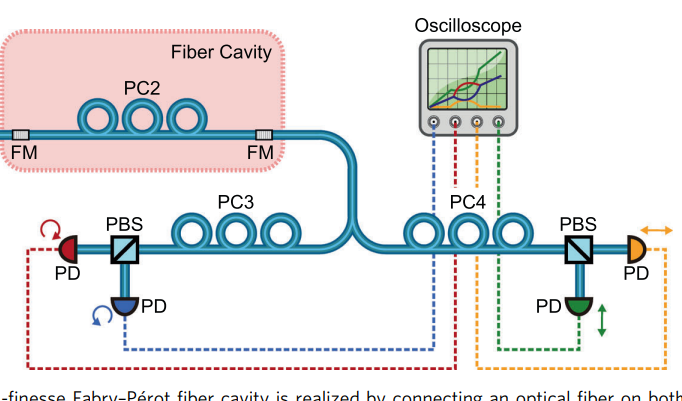

However, these photodiodes have a certain offset voltage even when zero optical power is incident on them. 

To calculate this offset voltage for each diode, we take the average voltage of the *lowest* i.e., the first 1000 frequency datapoints in the dataset. This is not a very good method but works. This is valid assuming that the in the input beam most of the light intensity is concentrated close to the frequency with zero detuning, and thus the power at very low frequencies is close to zero. Thus averaging the voltage over these frequencies will give us a good approximate for the offset voltage for each diode.

Also, the calculation for the offset voltage is performed for each input power, each diode, seperately.

In [ ]:
# First we find the average of the first 1000 entries
# Then we add a new column to the database to store these means
df54['mean'] = df54.iloc[:,0:1000].mean(axis=1)
df97['mean'] = df54.iloc[:,0:1000].mean(axis=1)
df132['mean'] = df54.iloc[:,0:1000].mean(axis=1)

This mean calculated represents the offset voltage in the photodiodes - i.e. the voltage across the diode when there is no optical power applied.

Also, to calculate the optical power (in mW), after removing the offset, we multiply it by a set of experimentally determined caliberation factors, provided to us by Prof. Niall. 

2.10 - Right handed polarization diode

2.21 - Left handed polarization diode

5.53 - Vertical polarization

3.86 - Horizontal polarization

In [ ]:
# Remove offset voltage 
for i in range(20199):
  df54[i] = (df54[i] - df54['mean'])

for i in range(23084):
  df97[i] = (df97[i] - df97['mean'])

for i in range(12024):
  df132[i] = (df132[i] - df132['mean'])

**A) When the input power is 5.4 mW**

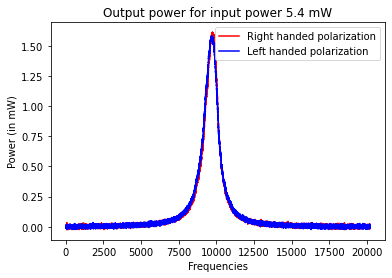

In [ ]:
# Plot right circular polarization transmission spectrum
x = np.linspace(0,20199,20199) # Frequencies
righthandedPower = 2.1*np.array(df54.iloc[0][0:20199])
lefthandedPower = 2.21*np.array(df54.iloc[1][0:20199])
plt.plot(x,righthandedPower,'r',label="Right handed polarization")
plt.plot(x,lefthandedPower,'b',label="Left handed polarization")
plt.title('Output power for input power 5.4 mW')
plt.xlabel("Frequencies")
plt.ylabel("Power (in mW)")
plt.legend()
plt.show()

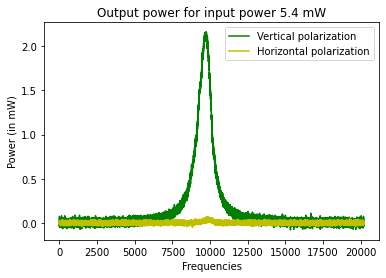

In [ ]:
# Plot right circular polarization transmission spectrum
x = np.linspace(0,20199,20199) # Frequencies
vertPolarPower = 5.53*np.array(df54.iloc[2][0:20199])
horPolarPower = 3.86*np.array(df54.iloc[3][0:20199])
plt.plot(x,vertPolarPower,'g',label="Vertical polarization")
plt.plot(x,horPolarPower,'y',label="Horizontal polarization")
plt.title('Output power for input power 5.4 mW')
plt.xlabel("Frequencies")
plt.ylabel("Power (in mW)")
plt.legend()
plt.show()

**B) When the input power is 9.7 mW**

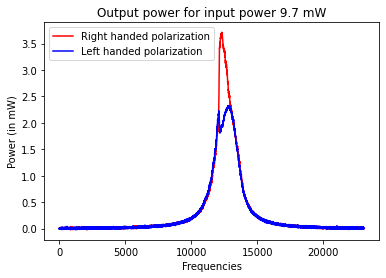

In [ ]:
# Plot right circular polarization transmission spectrum
x = np.linspace(0,23084,23084) # Frequencies
righthandedPower = 2.1*np.array(df97.iloc[0][0:23084])
lefthandedPower = 2.21*np.array(df97.iloc[1][0:23084])
plt.plot(x,righthandedPower,'r',label="Right handed polarization")
plt.plot(x,lefthandedPower,'b',label="Left handed polarization")
plt.title('Output power for input power 9.7 mW')
plt.xlabel("Frequencies")
plt.ylabel("Power (in mW)")
plt.legend()
plt.show()

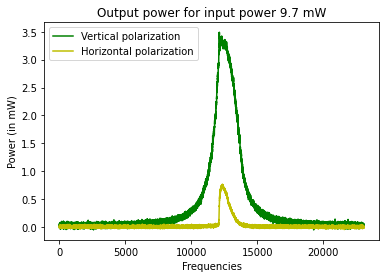

In [ ]:
# Plot right circular polarization transmission spectrum
x = np.linspace(0,23084,23084) # Frequencies
vertPolarPower = 5.53*np.array(df97.iloc[2][0:23084])
horPolarPower = 3.86*np.array(df97.iloc[3][0:23084])
plt.plot(x,vertPolarPower,'g',label="Vertical polarization")
plt.plot(x,horPolarPower,'y',label="Horizontal polarization")
plt.title('Output power for input power 9.7 mW')
plt.xlabel("Frequencies")
plt.ylabel("Power (in mW)")
plt.legend()
plt.show()

**When the input power is 13.2 mW**

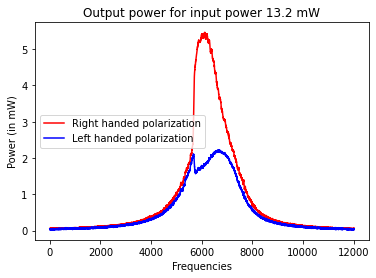

In [ ]:
# Plot right circular polarization transmission spectrum
x = np.linspace(0,12024,12024) # Frequencies
righthandedPower = 2.1*np.array(df132.iloc[0][0:12024])
lefthandedPower = 2.21*np.array(df132.iloc[1][0:12024])
plt.plot(x,righthandedPower,'r',label="Right handed polarization")
plt.plot(x,lefthandedPower,'b',label="Left handed polarization")
plt.title('Output power for input power 13.2 mW')
plt.xlabel("Frequencies")
plt.ylabel("Power (in mW)")
plt.legend()
plt.show()

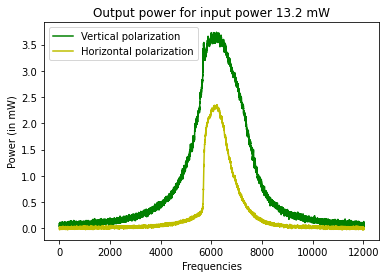

In [ ]:
# Plot right circular polarization transmission spectrum
x = np.linspace(0,12024,12024) # Frequencies
vertPolarPower = 5.53*np.array(df132.iloc[2][0:12024])
horPolarPower = 3.86*np.array(df132.iloc[3][0:12024])
plt.plot(x,vertPolarPower,'g',label="Vertical polarization")
plt.plot(x,horPolarPower,'y',label="Horizontal polarization")
plt.title('Output power for input power 13.2 mW')
plt.xlabel("Frequencies")
plt.ylabel("Power (in mW)")
plt.legend()
plt.show()

Clearly, we can see that there is a good match between the plots in the paper, and our plots.

#Final Remarks



In this paper it has been experimentally demonstrated that Kerr nonlinearity mediated symmetry breaking can be observed for
the polarization states of continuous wave light. At low powers this system maintains symmetry. At a
measured threshold power of 7 mW, spontaneous symmetry
breaking of the resonator modes splits up the linear polarized
light into left and right polarized light. It was further demonstrated
that the output polarization can be optically controlled by using a
resonator with slight asymmetries due to birefringence. This
makes it possible to continuously change the output polarization state
from linear to elliptical and close to circular polarization. This symmetry breaking can be used to generate an orthogonal polarization
component with respect to the linear polarized input light. In addition,
this type of polarization controller does not rely on magneto- or
electro-optical effects and only relies on the Kerr-nonlinearity
that is present in all materials, thus reducing fabrication complexity and eliminating the need for electrical connections.

#References

[1] Moroney, N., Del Bino, L., Zhang, S. et al. A Kerr polarization controller. Nat Commun 13, 398 (2022). https://doi.org/10.1038/s41467-021-27933-x

[2]  Hill, L., Oppo, G.-L., Woodley, M. T. M. & Del’Haye, P. Effects of self- and cross-phase modulation on the spontaneous symmetry breaking of light in ring resonators. Phys. Rev. A 101, 013823 (2020).

The authors have been generous to provide data to us to replicate and cross check the validity of plots. They have also been very supportive in answering our queries and engaging in a conversation. We hence thank them for their kind help.